In [1]:
from itertools import product

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm, trange

# binary RVs (2 x 2 x 2)

In [257]:
def h(p):
    if p == 0 or p == 1:
        return 0
    return - p * np.log(p) - (1-p) * np.log(1-p)

class StochMap:
    def __init__(self, a, b, in_marginal, out_marginal):
        self.in_marginal = in_marginal
        self.a = a
        
        if out_marginal is None:
            assert b is not None
            self.out_marginal = in_marginal * a +  (1-in_marginal) * b
        else:
            self.out_marginal = out_marginal
        
        if b is None:
            self.b = (out_marginal - in_marginal * a) / (1 - in_marginal)
        else:
            self.b = b
            
        
    def cond_ent(self):
        return self.in_marginal * h(self.a) + (1 - self.in_marginal) * h(self.b)    
        
    def __mul__(self, other):
        return StochMap(
            self.a * other.a + (1-self.a) * (other.b),
            None, 
            self.in_marginal,
            other.out_marginal
        )

In [96]:
p, q = .2, .4
a, b, c = 1, 0, .4

enc = StochMap(a, b, p, None)
dec = StochMap(c, None, enc.out_marginal, q)

enc_dec = enc * dec 


print(enc.cond_ent())
print(dec.cond_ent())
print(enc_dec.cond_ent())

0.0
0.6730116670092564
0.6730116670092564


In [135]:
p, q = .2, .4
num_points = 200
# R = 100
R = h(.5) / 3

val_range = np.linspace(0, 1, num_points)
objectives, params = [], []
for a, b, c in tqdm(product(val_range, val_range, val_range), total=num_points**3):
    params.append((a, b, c))
    enc = StochMap(a, b, p, None)
    dec = StochMap(c, None, enc.out_marginal, q)
    if h(enc.out_marginal) <= R:
        j = (enc * dec).cond_ent()
        objectives.append(j)
    else:
        objectives.append(np.nan)

params = np.array(params)
objectives = np.array(objectives)

  0%|          | 0/8000000 [00:00<?, ?it/s]

/var/folders/tz/4_n876296_s5_8c32v2pv84h0000gn/T/ipykernel_98297/2443121150.py:4: RuntimeWarning: invalid value encountered in log
  return - p * np.log(p) - (1-p) * np.log(1-p)
/var/folders/tz/4_n876296_s5_8c32v2pv84h0000gn/T/ipykernel_98297/2443121150.py:18: RuntimeWarning: divide by zero encountered in double_scalars
  self.b = (out_marginal - in_marginal * a) / (1 - in_marginal)
/var/folders/tz/4_n876296_s5_8c32v2pv84h0000gn/T/ipykernel_98297/2443121150.py:28: RuntimeWarning: invalid value encountered in double_scalars
  self.a * other.a + (1-self.a) * (other.b),


In [139]:
o = np.nanmin(objectives)
print(f'H(Y|X) = {o:.5f}, R<={R:.4f}, H(Y)={h(q):.4f}')
print()
for a, b, c in params[objectives == o]:
    # if a==1:
    print(f'{a=:.4f}, {b=:.4f}, {c=:.4f}')
    enc = StochMap(a, b, p, None)
    dec = StochMap(c, None, enc.out_marginal, q)
    print(f'p={enc.in_marginal:.4f}, t={dec.in_marginal:.4f}, q={dec.out_marginal:.4f}')
    print(f'H(T)={h(enc.out_marginal):.4f}')
    print(f'dec={dec.a} {dec.b}')
    
    print()

H(Y|X) = 0.44987, R<=0.2310, H(Y)=0.6730

a=0.9598, b=0.9899, c=0.0000
p=0.2000, t=0.9839, q=0.4000
H(T)=0.0824
dec=0.0 24.875000000000032

a=0.9799, b=0.9950, c=0.0000
p=0.2000, t=0.9920, q=0.4000
H(T)=0.0468
dec=0.0 49.750000000000064

a=1.0000, b=0.9246, c=1.0000
p=0.2000, t=0.9397, q=0.4000
H(T)=0.2278
dec=1.0 -8.949999999999994

a=1.0000, b=0.9296, c=1.0000
p=0.2000, t=0.9437, q=0.4000
H(T)=0.2166
dec=1.0 -9.660714285714299

a=1.0000, b=0.9347, c=1.0000
p=0.2000, t=0.9477, q=0.4000
H(T)=0.2051
dec=1.0 -10.480769230769269

a=1.0000, b=0.9397, c=1.0000
p=0.2000, t=0.9518, q=0.4000
H(T)=0.1933
dec=1.0 -11.437500000000014

a=1.0000, b=0.9447, c=1.0000
p=0.2000, t=0.9558, q=0.4000
H(T)=0.1811
dec=1.0 -12.5681818181818

a=1.0000, b=0.9497, c=1.0000
p=0.2000, t=0.9598, q=0.4000
H(T)=0.1686
dec=1.0 -13.925000000000017

a=1.0000, b=0.9548, c=1.0000
p=0.2000, t=0.9638, q=0.4000
H(T)=0.1556
dec=1.0 -15.583333333333403

a=1.0000, b=0.9598, c=1.0000
p=0.2000, t=0.9678, q=0.4000
H(T)=0.1422
dec

In [130]:
# T = X

a = 1
b = 0

objectives = []
for c in val_range:
    enc = StochMap(a, b, p, None)
    dec = StochMap(c, None, enc.out_marginal, q)
    if h(enc.out_marginal) <= R:
        j = (enc * dec).cond_ent()
        objectives.append(j)
    else:
        objectives.append(np.nan)

In [131]:
o = np.nanmin(objectives)
print(o)
for c in val_range[objectives == o]:
    print(a, b, c)
    print(enc.in_marginal, enc.out_marginal, dec.in_marginal, dec.out_marginal)

nan


/var/folders/tz/4_n876296_s5_8c32v2pv84h0000gn/T/ipykernel_98297/2879765926.py:1: RuntimeWarning: All-NaN axis encountered
  o = np.nanmin(objectives)


# m x n

In [2]:
from scipy.stats import entropy as h
    
class StochMap:
    def __init__(self, p, in_marg, out_marg):
        
        p[-1, :] = 1 - np.sum(p[:-1, :], axis=0)
        in_marg[-1] = 1 - np.sum(in_marg[:-1])
        
        if out_marg is None:
            assert not np.isnan(p).any()
            out_marg = (p * in_marg).sum(axis=1)
        else:    
            out_marg[-1] = 1 - np.sum(out_marg[:-1])
        
        if np.isnan(p[:, -1]).any():
            p[:, -1] = out_marg - (p * in_marg)[:, :-1].sum(axis=1)
            p[:, -1] = p[:, -1] / in_marg[-1]
    
        self.p = p
        self.in_marg = in_marg
        self.out_marg = out_marg
    
    
    def validate(self):    
        assert not np.isnan(self.p).any()
        assert not np.isnan(self.in_marg).any()
        assert not np.isnan(self.out_marg).any()
        assert np.allclose(self.p.sum(axis=0), 1)
        assert np.allclose(self.in_marg.sum(), 1)
        assert np.allclose(self.out_marg.sum(), 1)
        assert np.allclose(self.out_marg, (self.p * self.in_marg).sum(axis=1))
        
    def cond_ent(self):
        return np.sum(h(self.p, axis=0) * self.in_marg)
    
    def ent(self):
        return h(self.out_marg)
    
    def mutual_info(self):
        return self.ent() - self.cond_ent()
    
    def __repr__(self) -> str:
        return f'{self.p}, \n in_marg: {self.in_marg}, \n out_marg: {self.out_marg}'
    
    def __mul__(self, next_map):
        return StochMap(
            next_map.p @ self.p,
            self.in_marg,
            next_map.out_marg
        )

In [3]:
x_marg = np.array([.2, np.nan]) 
y_marg = np.array([.4, np.nan]) 

enc_p = np.array([
    [.4, .5],
    [np.nan, np.nan]
    ])
dec_p = np.array([
    [.4, np.nan],
    [np.nan, np.nan]
    ])


enc = StochMap(enc_p, x_marg, None)
dec = StochMap(dec_p, enc.out_marg, y_marg)

enc_dec = enc * dec 


print(enc.cond_ent())
print(dec.cond_ent())
print(enc_dec.cond_ent())

0.6891200778498076
0.6730116670092565
0.6730116670092566


In [445]:
x_marg = np.array([.2, np.nan]) 
y_marg = np.array([.4, np.nan])

num_points = 200
# R = 100
R = h([.5, .5]) / 3

val_range = np.linspace(0, 1, num_points)
objectives, params, rates = [], [], []
for a, b, c in tqdm(product(val_range, val_range, val_range), total=num_points**3):
    params.append((a, b, c))
    
    enc_p = np.array([
        [a, b],
        [np.nan, np.nan]
        ])
    dec_p = np.array([
        [c, np.nan],
        [np.nan, np.nan]
        ])
    
    enc = StochMap(enc_p, x_marg, None)
    dec = StochMap(dec_p, enc.out_marg, y_marg)

    if np.all(dec.p <=1) and np.all(0 <= dec.p):
        j = (enc * dec).cond_ent()
    else: 
        j = -1
        
    objectives.append(j)
    rates.append(h(enc.out_marg))
    
params = np.array(params)
objectives = np.array(objectives)
rates = np.array(rates)

  0%|          | 0/8000000 [00:00<?, ?it/s]

/var/folders/tz/4_n876296_s5_8c32v2pv84h0000gn/T/ipykernel_98297/1652753013.py:17: RuntimeWarning: divide by zero encountered in true_divide
  p[:, -1] = p[:, -1] / in_marg[-1]


In [496]:
R = 100
R = h([1, 1])/2

best_obj = np.min(objectives[(objectives != -1) & (rates <= R)])

print(f'H(Y|X) = {best_obj:.5f}, R = {R:.4f}')
print(f'H(Y)={h([y_marg[0], 1-y_marg[0]]):.4f}, H(X)={h([x_marg[0], 1-x_marg[0]]):.4f}')
print()

print(np.sum(objectives == best_obj))
for a, b, c in params[objectives == best_obj]:
    
    enc_p = np.array([
        [a, b],
        [np.nan, np.nan]
        ])
    dec_p = np.array([
        [c, np.nan],
        [np.nan, np.nan]
        ])
    enc = StochMap(enc_p, x_marg, None)
    dec = StochMap(dec_p, enc.out_marg, y_marg)
    
    # print(f'{a=:.4f}, {b=:.4f}, {c=:.4f}')
    print(f'H(T)={h(enc.out_marg):.4f}, t={dec.in_marg},\n {enc.p}')
    # print(f'dec = \n {dec.p}')
    # print(f'enc = \n {enc.p}')
    
    # print()

H(Y|X) = 0.62812, R = 0.3466
H(Y)=0.6730, H(X)=0.5004

1
H(T)=0.3456, t=[0.10954774 0.89045226],
 [[0.54773869 0.        ]
 [0.45226131 1.        ]]


In [541]:
def f():
    global s
    s += [1]
    print(s)
        
s = [[1], [2, 2, 3], 3]
f()

print(s)


[[1], [2, 2, 3], 3, 1]
[[1], [2, 2, 3], 3, 1]


In [15]:
a, b, c = 1, 1, 0
P_x = np.array([.1, .2, .7])

p = np.array([
    [a, b, c],
    [np.nan, np.nan, np.nan]
])
enc = StochMap(p, P_x, None)

0.6108643020548935

simple example 

In [72]:
P_x = np.array([.1, .2, .7])

values = np.stack(np.meshgrid(*[np.linspace(0, 1, 10)]*6), -1).reshape(-1, 6)

H_t, I = [], []
for v in tqdm(values):
    p = np.row_stack([v.reshape(2, 3),[np.nan, np.nan, np.nan]]).copy()
    if (np.nansum(p, axis=0) > 1).any():
        H_t.append(-1)
        I.append(-1)
    else:
        enc = StochMap(p, P_x, None)
        H_t.append(enc.ent())
        I.append(enc.mutual_info())

H_t, I = np.array(H_t), np.array(I)

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [11]:
from scipy.stats import entropy as h

P_x = np.array([.1, .2, .7])

P_tx = np.stack(np.meshgrid(*[np.linspace(0, 1, 20)]*6), -1).reshape(-1, 2, 3)
# P_tx = np.stack(np.meshgrid(*[np.linspace(0, 1, 100)]*3), -1).reshape(-1, 1, 3)

P_tx = np.concatenate((P_tx, np.zeros((P_tx.shape[0], 1, P_tx.shape[-1]))), axis=1)
P_tx[:, -1, :] = 1 - P_tx[:, :-1, :].sum(axis=1)
P_tx = P_tx[np.all(P_tx >= 0, axis=(1, 2))]

P_h = P_tx @ P_x

H_t = h(P_h, axis=1)
H_tx = h(P_tx, axis=1) @ P_x
I = H_t - H_tx

In [13]:
R_values = np.linspace(0, 1, 100)
best_I, best_H = [], []
for R in tqdm(R_values):
    best = np.max(I[H_t <= R])
    best_I.append(best)        
    best_H.append(H_t[I == best][0])
    
best_I, best_H = np.array(best_I), np.array(best_H)

  0%|          | 0/100 [00:00<?, ?it/s]

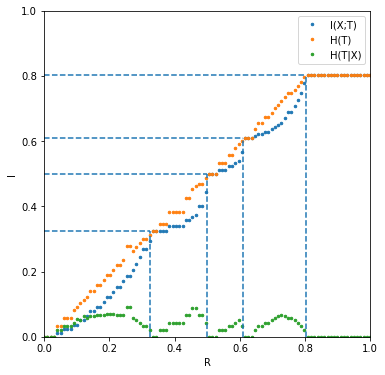

In [18]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(R_values, best_I, '.', ms=5, label='I(X;T)')
ax.plot(R_values, best_H, '.', ms=5, label='H(T)')
ax.plot(R_values, best_H - best_I, '.', ms=5, label='H(T|X)')
ax.axhline(h(P_x), xmax=h(P_x), ls='--')
ax.axhline(h([.3, .7]), xmax=h([.3, .7]), ls='--')
ax.axhline(h([.2, .8]), xmax=h([.2, .8]), ls='--')
ax.axhline(h([.1, .9]), xmax=h([.1, .9]), ls='--')
ax.axvline(h(P_x), ymax=h(P_x), ls='--')
ax.axvline(h([.3, .7]), ymax=h([.3, .7]), ls='--')
ax.axvline(h([.2, .8]), ymax=h([.2, .8]), ls='--')
ax.axvline(h([.1, .9]), ymax=h([.1, .9]), ls='--')

ax.axis('scaled')
ax.set(xlim=(0, 1), ylim=(0, 1), xlabel='R', ylabel='I');
ax.legend()

For max I(X; T), st. H(T)<=R, can we say the optimal solution is always when we have T as a function of X?

[0.61086428 0.61086428]


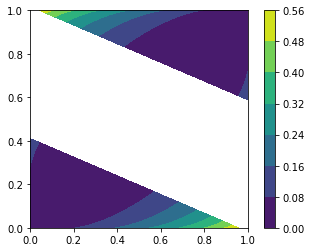

In [23]:
def h(p):
    return - p * np.log(p+1e-8) - (1-p) * np.log(1-p+1e-8)

a = np.array([0.3, 0.7])
print(h(a))
R = 0.6

p1 = np.linspace(0, 1, 1000)
p2 = np.linspace(0, 1, 1000)
p1v, p2v = np.meshgrid(p1, p2)

H_t = h(a[0]*p1v + a[1]*p2v)
H_t_given_x = (a[0] * h(p1v) + a[1] * h(p2v))
I = H_t - H_t_given_x

I[H_t >= R] = np.nan

plt.contourf(p1v, p2v, I)
plt.axis('scaled')
plt.colorbar()

# best = np.nanmax(I)
# plt.plot(p1v == best)